# insurance claims fraud detection

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv')
df

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
995,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
996,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
997,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [3]:
column_names = ['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported',]

df.columns = column_names

In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y


In [5]:
df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           999 non-null    int64  
 1   age                          999 non-null    int64  
 2   policy_number                999 non-null    int64  
 3   policy_bind_date             999 non-null    object 
 4   policy_state                 999 non-null    object 
 5   policy_csl                   999 non-null    object 
 6   policy_deductable            999 non-null    int64  
 7   policy_annual_premium        999 non-null    float64
 8   umbrella_limit               999 non-null    int64  
 9   insured_zip                  999 non-null    int64  
 10  insured_sex                  999 non-null    object 
 11  insured_education_level      999 non-null    object 
 12  insured_occupation           999 non-null    object 
 13  insured_hobbies     

In [7]:
df = df.dropna()

In [8]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
5,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
995,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
996,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
997,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [9]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [10]:
# printing all data type and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('******************************************')

policy_bind_date
28-04-1992    3
01-01-2006    3
05-08-1992    3
28-12-2002    2
28-12-1991    2
             ..
05-07-2003    1
18-02-1995    1
13-12-2014    1
01-06-1997    1
11-11-1996    1
Name: count, Length: 864, dtype: int64
******************************************
policy_state
OH    318
IL    310
IN    280
Name: count, dtype: int64
******************************************
policy_csl
100/300     326
250/500     315
500/1000    267
Name: count, dtype: int64
******************************************
insured_sex
FEMALE    494
MALE      414
Name: count, dtype: int64
******************************************
insured_education_level
High School    146
JD             145
MD             131
Masters        130
Associate      129
PhD            115
College        112
Name: count, dtype: int64
******************************************
insured_occupation
machine-op-inspct    87
prof-specialty       77
tech-support         71
sales                70
craft-repair         69
exec-manage

In [11]:
# replacing '?' with No info
df=df.replace('?','No Info')

In [12]:
# printing all data type and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('******************************************')

policy_bind_date
28-04-1992    3
01-01-2006    3
05-08-1992    3
28-12-2002    2
28-12-1991    2
             ..
05-07-2003    1
18-02-1995    1
13-12-2014    1
01-06-1997    1
11-11-1996    1
Name: count, Length: 864, dtype: int64
******************************************
policy_state
OH    318
IL    310
IN    280
Name: count, dtype: int64
******************************************
policy_csl
100/300     326
250/500     315
500/1000    267
Name: count, dtype: int64
******************************************
insured_sex
FEMALE    494
MALE      414
Name: count, dtype: int64
******************************************
insured_education_level
High School    146
JD             145
MD             131
Masters        130
Associate      129
PhD            115
College        112
Name: count, dtype: int64
******************************************
insured_occupation
machine-op-inspct    87
prof-specialty       77
tech-support         71
sales                70
craft-repair         69
exec-manage

# description of data set

In [13]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,908.000000,908.000000,908.000000,908.000000,908.000000,9.080000e+02,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,204.892070,39.030837,546107.605727,1131.607930,1256.432170,1.089207e+06,500635.000000,24792.290749,-26953.303965,12.070485,1.924009,1.002203,1.481278,57492.114537,8102.643172,8059.449339,41330.022026,2005.126652
std,115.995083,9.192366,256423.285569,612.280474,245.320953,2.279716e+06,71505.151757,27718.645607,28278.950686,7.005077,1.031882,0.824110,1.111572,22786.799195,4617.262759,4552.473954,16258.336157,6.016189
min,0.000000,19.000000,100804.000000,500.000000,484.670000,-1.000000e+06,430141.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,337547.250000,500.000000,1089.607500,0.000000e+00,448137.250000,0.000000,-51800.000000,6.000000,1.000000,0.000000,0.000000,48045.000000,5255.000000,5332.500000,34357.500000,2000.000000
50%,201.500000,38.000000,533135.000000,1000.000000,1257.020000,0.000000e+00,466391.500000,0.000000,-22350.000000,13.000000,1.000000,1.000000,1.000000,60200.000000,7180.000000,7115.000000,43650.000000,2005.000000
75%,277.250000,45.000000,757918.000000,2000.000000,1415.695000,0.000000e+00,603005.250000,50400.000000,0.000000,18.000000,3.000000,2.000000,2.000000,72105.000000,11700.000000,11230.000000,51612.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


In [14]:
df['umbrella_limit'].value_counts()

umbrella_limit
 0           725
 6000000      50
 5000000      43
 4000000      37
 7000000      24
 3000000      11
 8000000       8
 9000000       4
 2000000       3
 10000000      2
-1000000       1
Name: count, dtype: int64

In [15]:
df.loc[df['umbrella_limit']== -1000000]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
289,284,42,526039,04-05-1995,OH,100/300,500,1338.54,-1000000,438178,...,1,No Info,94160,8560,17120,68480,Chevrolet,Malibu,1996,N


In [16]:
# Drop the row with umbrella_limit = -1000000
df.drop(df[df['umbrella_limit'] == -1000000].index, inplace=True)
# Split incident_date into three columns
for index, row in df.iterrows():
    incident_date = row['incident_date']
    incident_date_parts = incident_date.split('-')
    df.loc[index, 'incident_Date'] = incident_date_parts[0]
    df.loc[index, 'incident_Month'] = incident_date_parts[1]
    df.loc[index, 'incident_Year'] = incident_date_parts[2]
# Drop the incident_Year column
df.drop('incident_Year', axis=1, inplace=True)
# Split policy_bind_date into three columns
for index, row in df.iterrows():
    policy_bind_date = row['policy_bind_date']
    policy_bind_date_parts = policy_bind_date.split('-')
    df.loc[index, 'policy_bind_Date'] = policy_bind_date_parts[0]
    df.loc[index, 'policy_bind_Month'] = policy_bind_date_parts[1]
    df.loc[index, 'policy_bind_Year'] = policy_bind_date_parts[2]
# Drop the policy_bind_date column
df.drop('policy_bind_date', axis=1, inplace=True)


In [17]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
1,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,23100,Dodge,RAM,2007,N,22,02,06,09,2000
2,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,256,39,104594,OH,250/500,1000,1351.10,0,478456,FEMALE,...,51280,Saab,95,2003,Y,02,01,12,10,2006
5,137,34,413978,IN,250/500,1000,1333.35,0,441716,MALE,...,50050,Nissan,Pathfinder,2012,N,13,01,04,06,2000


In [18]:
# droping the policy_number and other useless columns as weel
df.drop(['policy_number','insured_zip','incident_location'],axis=1,inplace=True)

In [19]:
df.head(10)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
1,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,23100,Dodge,RAM,2007,N,22,02,06,09,2000
2,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,256,39,OH,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,...,51280,Saab,95,2003,Y,02,01,12,10,2006
5,137,34,IN,250/500,1000,1333.35,0,MALE,PhD,prof-specialty,...,50050,Nissan,Pathfinder,2012,N,13,01,04,06,2000
6,165,37,IL,100/300,1000,1137.03,0,MALE,Associate,tech-support,...,32830,Audi,A5,2015,N,27,02,03,02,1990
7,27,33,IL,100/300,500,1442.99,0,FEMALE,PhD,other-service,...,22160,Toyota,Camry,2012,N,30,01,05,02,1997
8,212,42,IL,100/300,500,1315.68,0,MALE,PhD,priv-house-serv,...,32900,Saab,92x,1996,N,05,01,25,07,2011
9,235,42,OH,100/300,500,1253.12,4000000,FEMALE,Masters,exec-managerial,...,63280,Ford,F150,2002,N,06,01,26,05,2002
10,447,61,OH,100/300,2000,1137.16,0,FEMALE,High School,exec-managerial,...,79560,Audi,A3,2006,N,15,02,29,05,1999


In [20]:
df.shape

(907, 40)

In [21]:
df['fraud_reported'].value_counts()

fraud_reported
N    667
Y    240
Name: count, dtype: int64

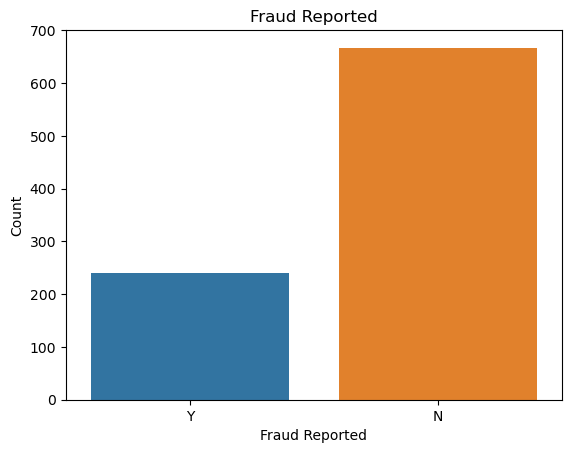

In [22]:
if 'fraud_reported' in df.columns:
    # Count the occurrences of each value in 'fraud_reported'
    fraud_counts = df['fraud_reported'].value_counts()
    
    # Create a countplot
    sns.countplot(x='fraud_reported', data=df)
    plt.title('Fraud Reported')
    plt.xlabel('Fraud Reported')
    plt.ylabel('Count')
    plt.show()
else:
    print("The 'fraud_reported' column does not exist in the DataFrame.")

we can notice data is imbalance we chace to deal with it

# EDA

In [23]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
1,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,23100,Dodge,RAM,2007,N,22,02,06,09,2000
2,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,256,39,OH,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,...,51280,Saab,95,2003,Y,02,01,12,10,2006
5,137,34,IN,250/500,1000,1333.35,0,MALE,PhD,prof-specialty,...,50050,Nissan,Pathfinder,2012,N,13,01,04,06,2000


<Axes: xlabel='fraud_reported', ylabel='total_claim_amount'>

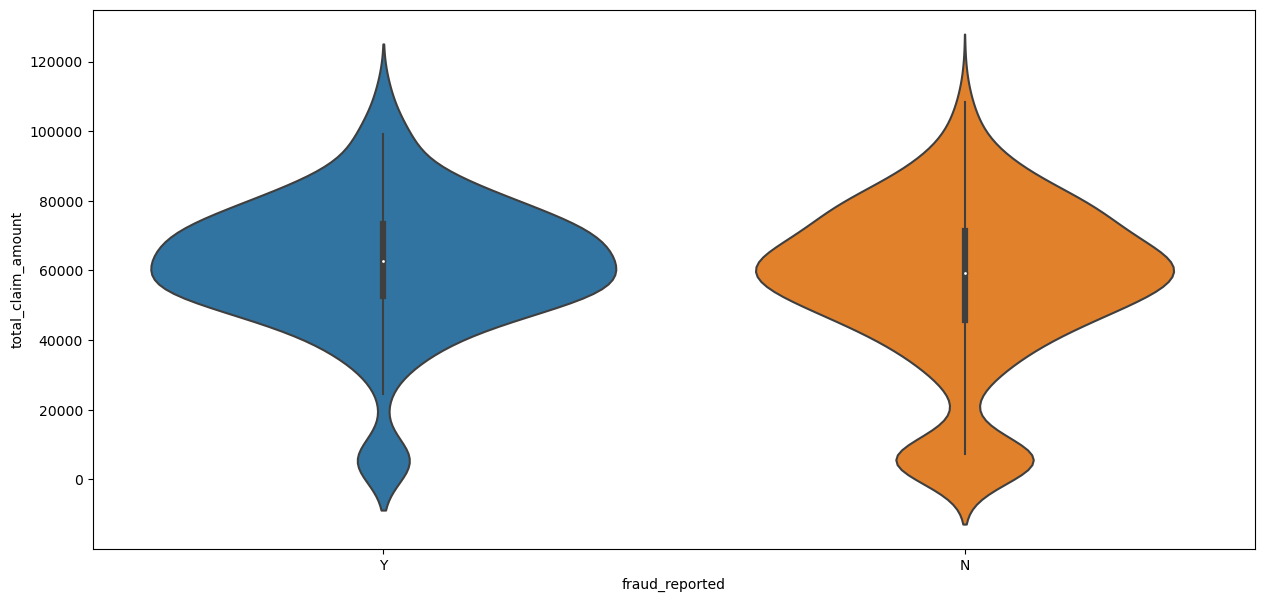

In [24]:
plt.figure(figsize=(15,7))
sns.violinplot(y='total_claim_amount',x='fraud_reported',data=df)

<Axes: xlabel='number_of_vehicles_involved', ylabel='count'>

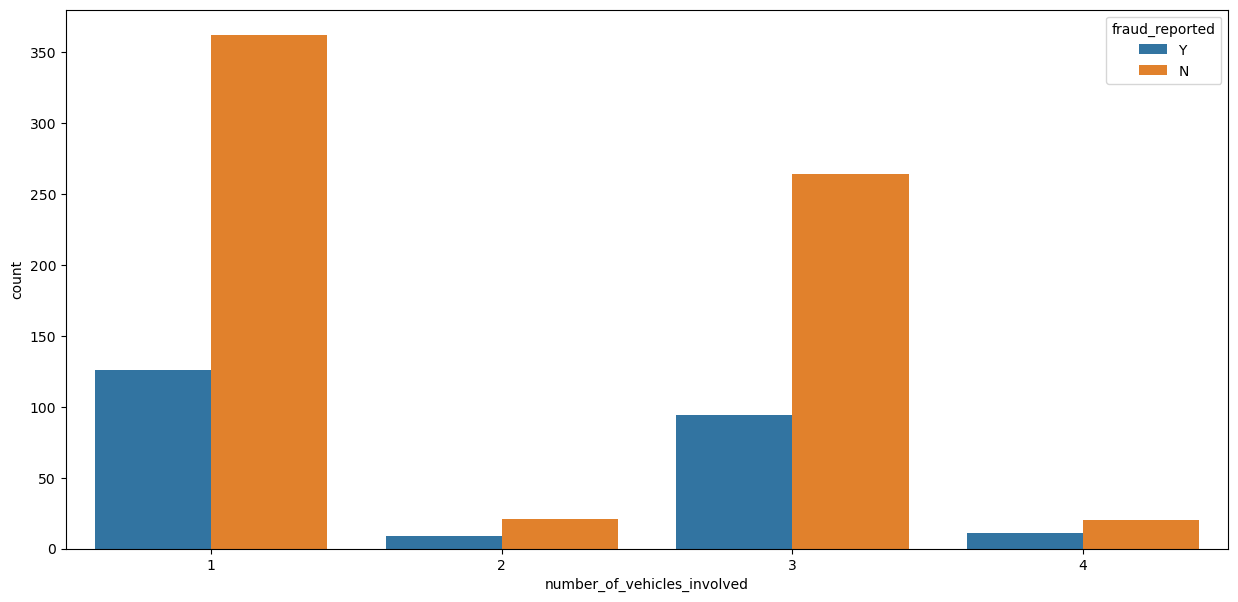

In [25]:
plt.figure(figsize=(15,7))

sns.countplot(x='number_of_vehicles_involved',hue='fraud_reported',data=df)

most of the fraud reported were found where number_of_vehicles_involved more than 1

<Axes: xlabel='incident_city', ylabel='count'>

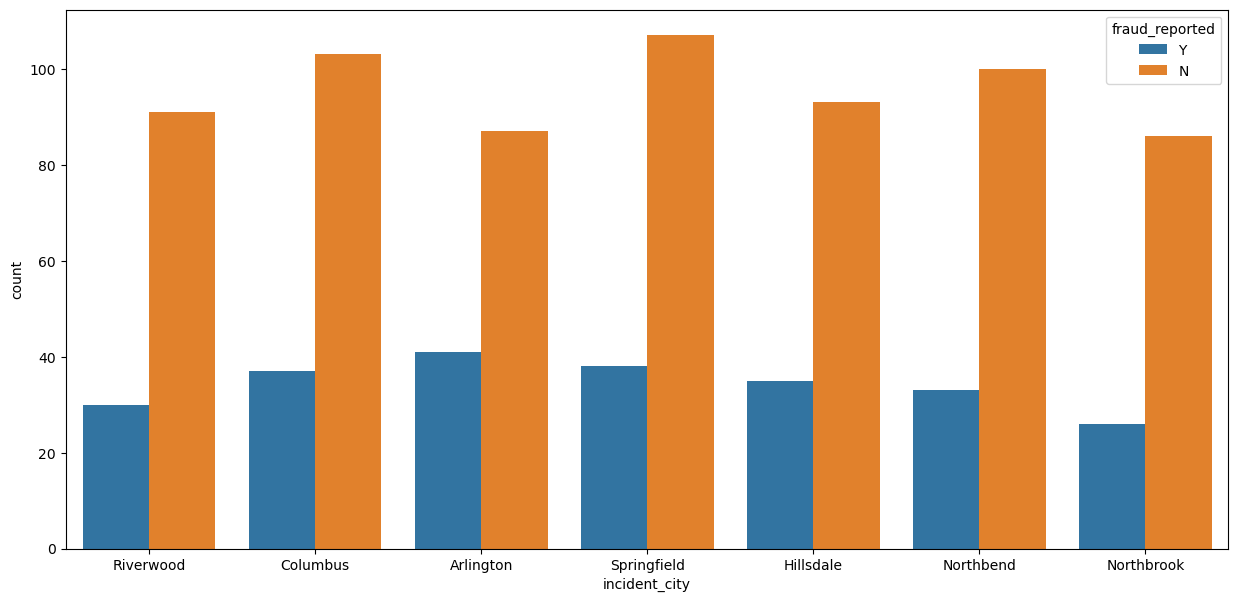

In [26]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_city',hue='fraud_reported',data=df)

in all the cities fraud reported counts are almost same

<Axes: xlabel='incident_state', ylabel='count'>

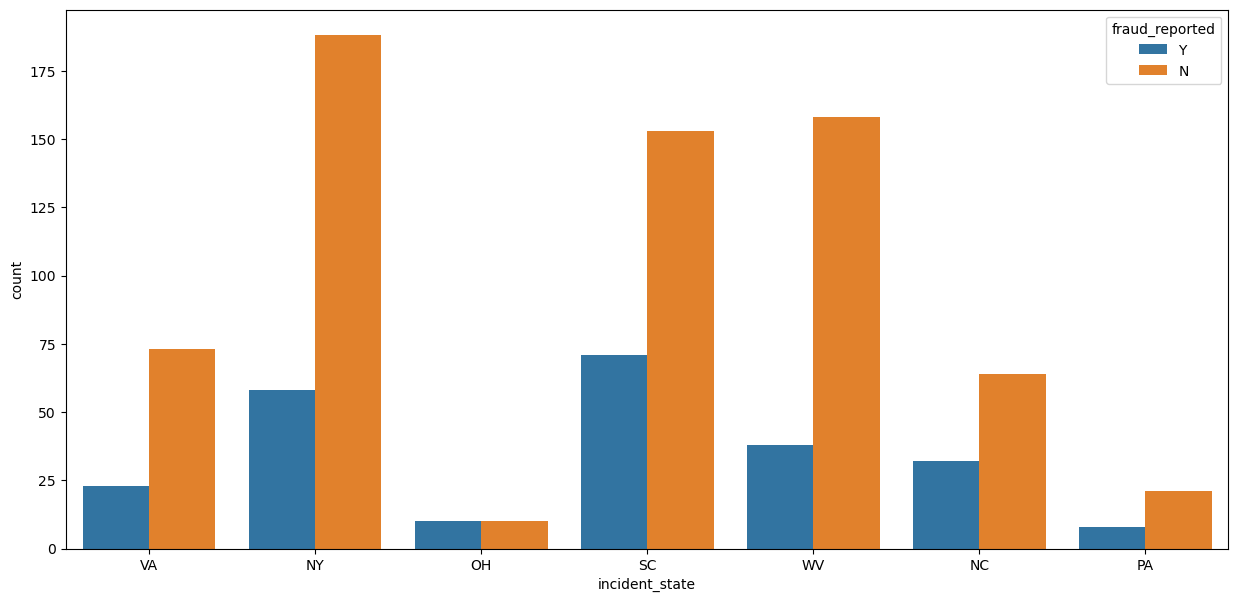

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_state',hue='fraud_reported',data=df)

most of the draud reported were found where incident state was SC,NY,OH,NC and PA

<Axes: xlabel='authorities_contacted', ylabel='count'>

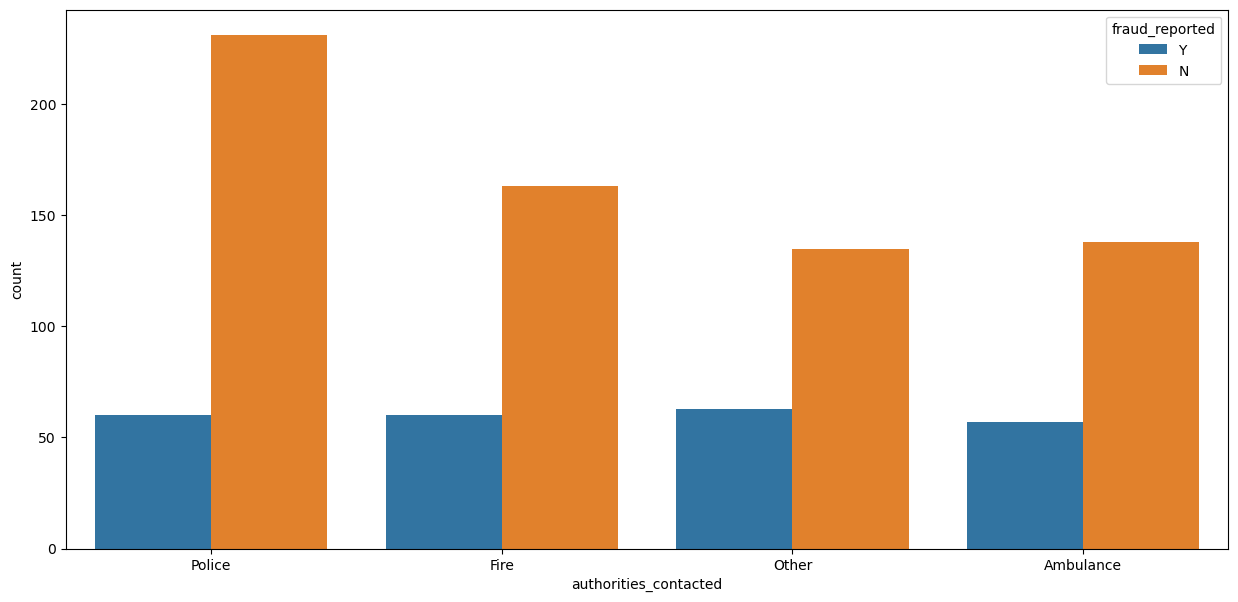

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=df)

most of the fraud founded where cx have contacted authorities

<Axes: xlabel='incident_severity', ylabel='count'>

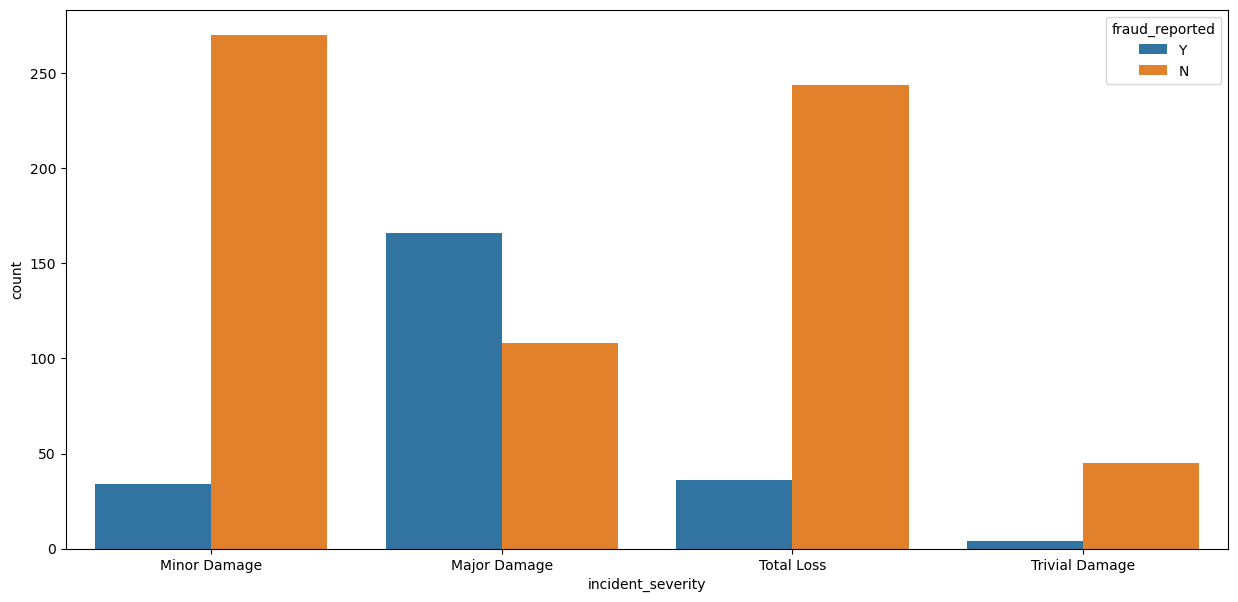

In [29]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_severity',hue='fraud_reported',data=df)

*  most of  fraud  reported claim are major damage most of them are counted as fraud

* there are very fraud report in trivial damage

<Axes: xlabel='collision_type', ylabel='count'>

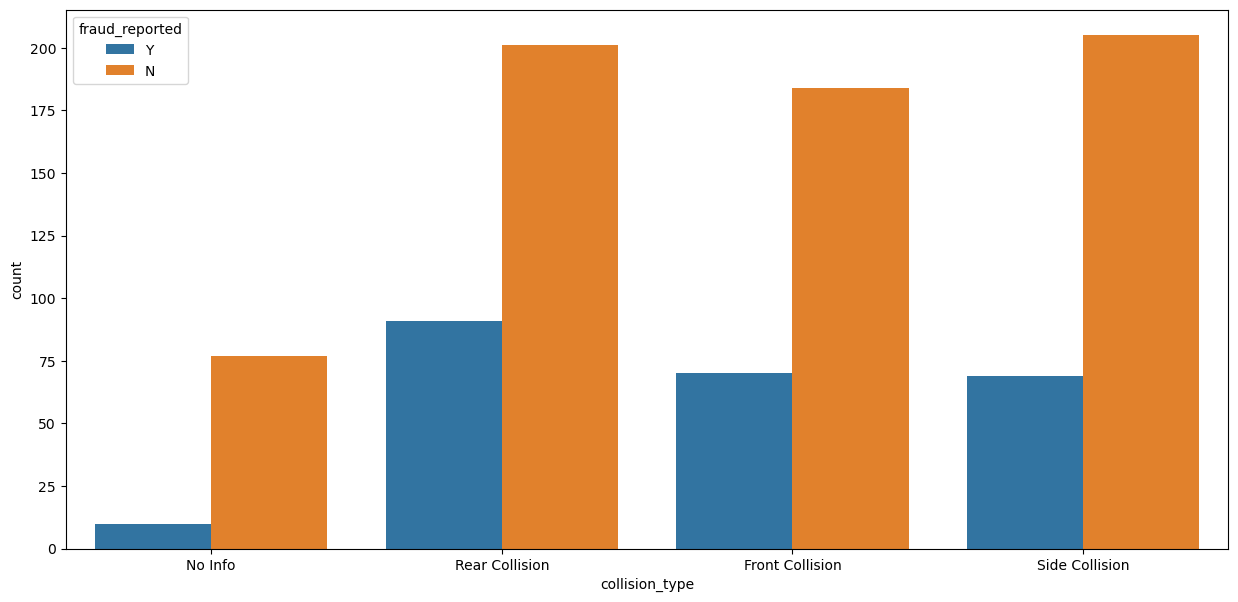

In [30]:
plt.figure(figsize=(15,7))
sns.countplot(x='collision_type',hue='fraud_reported',data=df)

* most of fraud reported claims in state collision ,rear collision and front collision
* some of reported claim we have those are in no info of collision type

<Axes: xlabel='incident_type', ylabel='count'>

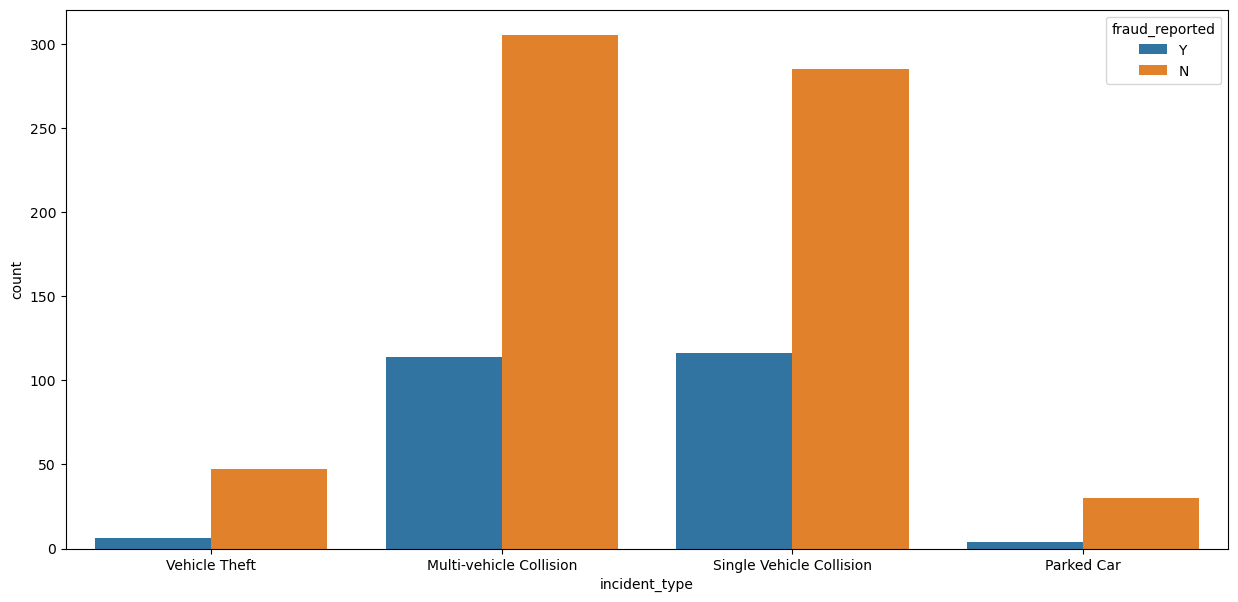

In [31]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_type',hue='fraud_reported',data=df)

* we have most claim reported annd fraud reported in single vehicle collision and multi-vehicle collision incident type
* in other two incident type vehicle theft an dparked car are very less fraud report

<Axes: xlabel='incident_Month', ylabel='count'>

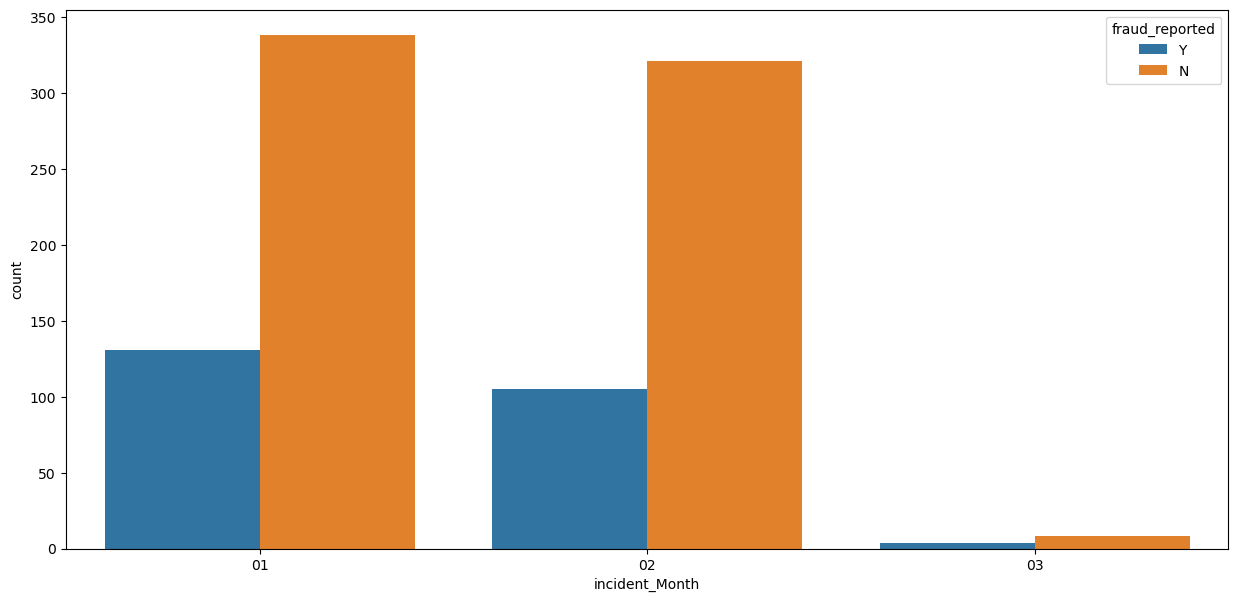

In [32]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_Month',hue='fraud_reported',data=df)

# skewness handling

# skew and outliers will be handel in numerical columns only

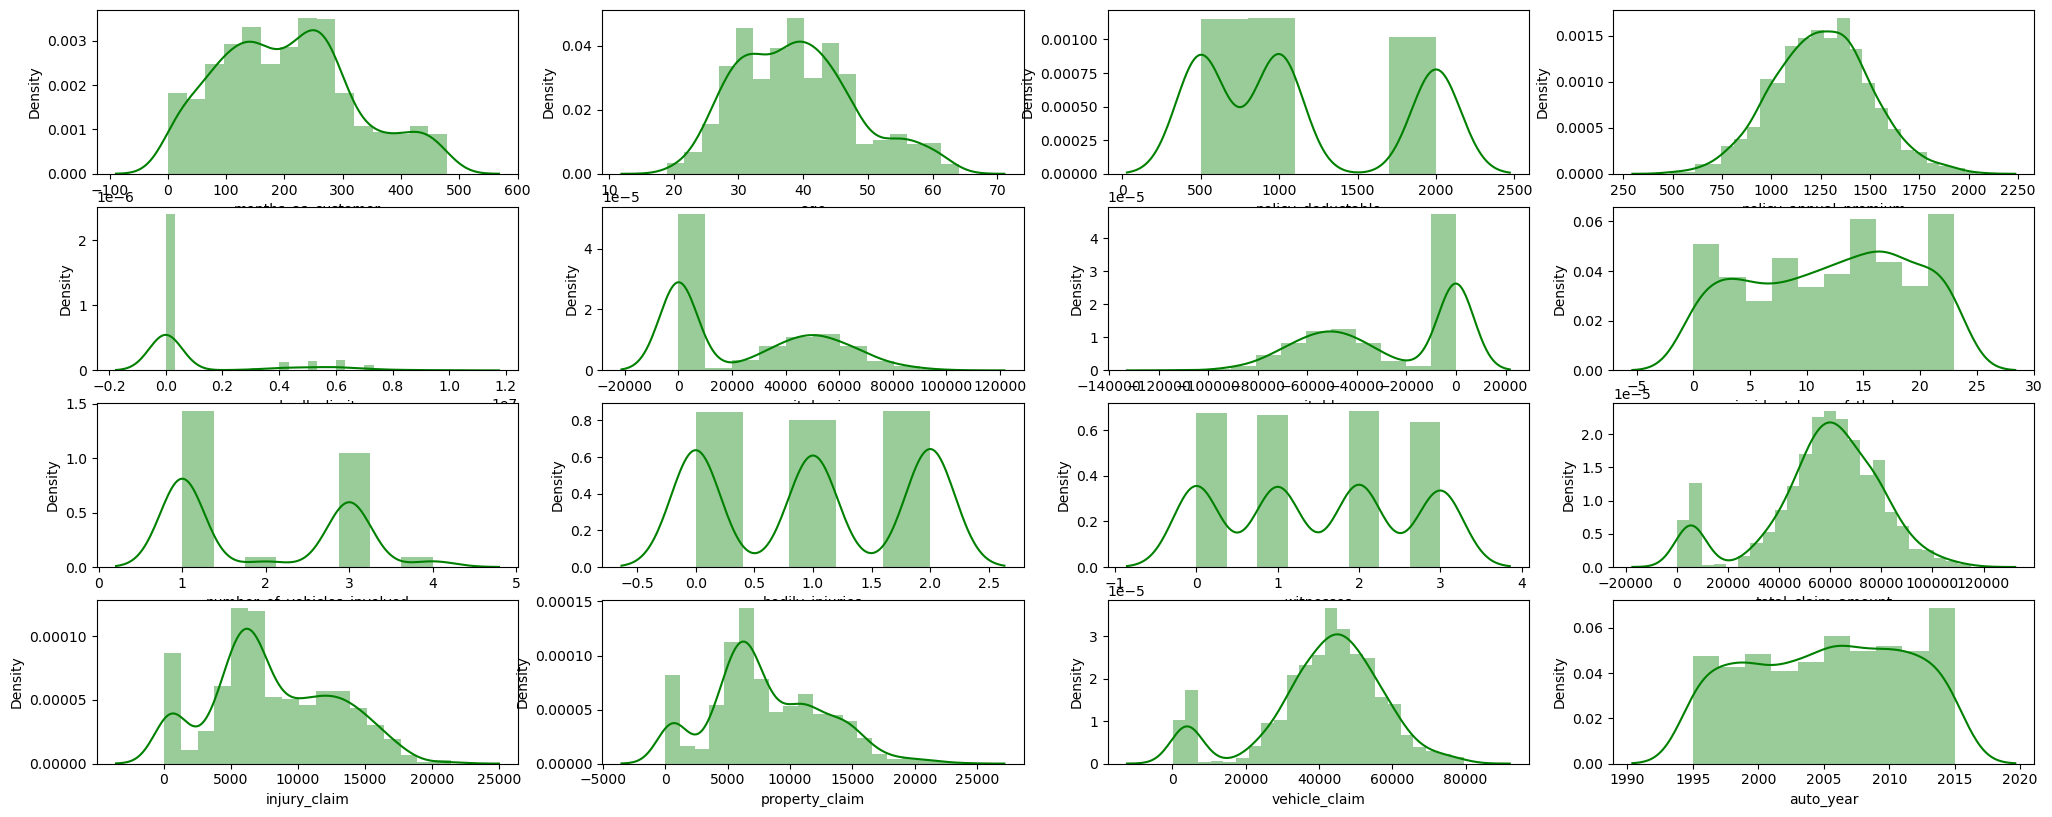

In [33]:
# ploting for numerical columns only
plt.figure(figsize=(25,20))
for i in enumerate(df.select_dtypes(include=['int64', 'float', 'int32'])):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [34]:
df.select_dtypes(include=['int64', 'float', 'int32']).skew()

months_as_customer             0.349055
age                            0.464514
policy_deductable              0.486067
policy_annual_premium          0.041225
umbrella_limit                 1.820848
capital-gains                  0.487063
capital-loss                  -0.389265
incident_hour_of_the_day      -0.146625
number_of_vehicles_involved    0.337573
bodily_injuries               -0.006137
witnesses                      0.014502
total_claim_amount            -0.746277
injury_claim                   0.211135
property_claim                 0.370373
vehicle_claim                 -0.784102
auto_year                     -0.073160
dtype: float64

skewness morethan +/-0.5 will we treated

will only deal with numerical columns

* umbrella_limit
* total_claim_amount
* vehicle_claim

will be treated

In [35]:
from sklearn.preprocessing import power_transform

# Apply power transformation to the specified columns
df[['umbrella_limit', 'total_claim_amount', 'vehicle_claim']] = power_transform(
    df[['umbrella_limit', 'total_claim_amount', 'vehicle_claim']], method='yeo-johnson'
)

# outlier handling

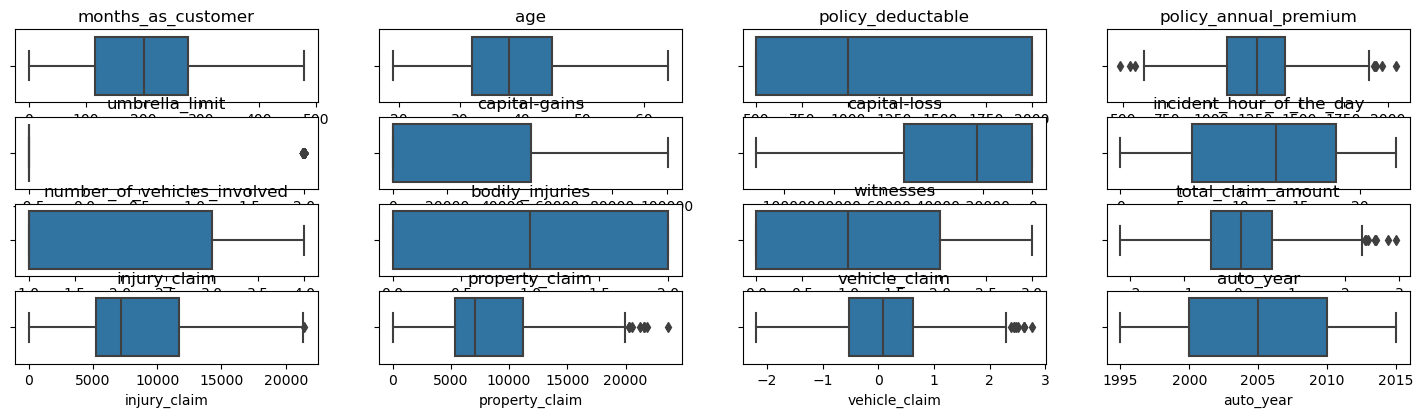

In [36]:
plt.figure(figsize=(18,10))
for i, col in enumerate(df.select_dtypes(include=['int64', 'float', 'int32']).columns):
    plt.subplot(9, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.show()

# outliers removal

# ZSCORE method

In [37]:
from scipy.stats import zscore

z=np.abs(zscore(df.select_dtypes(include=['int64','float','int32'])))

print(np.where(z>3))

(array([200, 446, 534, 695], dtype=int64), array([ 3, 13, 13,  3], dtype=int64))


In [38]:
df_1=df[(z<3).all(axis=1)]
print(('with outliers::',df.shape))
print('after removing outliers::',df_1.shape)

('with outliers::', (907, 40))
after removing outliers:: (903, 40)


after using zscore method we only lose 5 rows from the data

# IQR method

In [39]:
# Define a function to handle outlier removal for multiple columns
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower and upper limits for outliers
    low_limit = q1 - 1.5 * iqr
    high_limit = q3 + 1.5 * iqr
    
    # Find indices of outliers
    index = np.where((df[column] < low_limit) | (df[column] > high_limit))
    
    # Drop rows with outliers
    df= df.drop(df.index[index])
    
    return df

# List of columns to handle outliers
columns_to_check = ['months_as_customer', 'age',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit','capital-gains',
       'capital-loss','incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year' ]  # Add more columns as needed

# Loop through each column and remove outliers
for col in columns_to_check:
    df= remove_outliers(df, col)

# Check the shape of the updated 'data' after removing outliers
data_shape = df.shape

# Reset index of the 'data' dataframe
df.reset_index(drop=True, inplace=True)


In [40]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'incident_Date',
       'incident_Month', 'policy_bind_Date', 'policy_bind_Month',
       'policy_bind_Year'],
      dtype='object')

In [41]:
df.shape

(701, 40)

# using labelencoder for convering categorical to numerical

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           701 non-null    int64  
 1   age                          701 non-null    int64  
 2   policy_state                 701 non-null    object 
 3   policy_csl                   701 non-null    object 
 4   policy_deductable            701 non-null    int64  
 5   policy_annual_premium        701 non-null    float64
 6   umbrella_limit               701 non-null    float64
 7   insured_sex                  701 non-null    object 
 8   insured_education_level      701 non-null    object 
 9   insured_occupation           701 non-null    object 
 10  insured_hobbies              701 non-null    object 
 11  insured_relationship         701 non-null    object 
 12  capital-gains                701 non-null    int64  
 13  capital-loss        

In [43]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Select categorical columns
categ_data = df.select_dtypes(exclude=['int64', 'float', 'int32']).columns

# Iterate over each categorical column
for val in categ_data:
    # Fit and transform the categorical values
    df[val] = le.fit_transform(df[val].astype(str))

# Print the DataFrame information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           701 non-null    int64  
 1   age                          701 non-null    int64  
 2   policy_state                 701 non-null    int32  
 3   policy_csl                   701 non-null    int32  
 4   policy_deductable            701 non-null    int64  
 5   policy_annual_premium        701 non-null    float64
 6   umbrella_limit               701 non-null    float64
 7   insured_sex                  701 non-null    int32  
 8   insured_education_level      701 non-null    int32  
 9   insured_occupation           701 non-null    int32  
 10  insured_hobbies              701 non-null    int32  
 11  insured_relationship         701 non-null    int32  
 12  capital-gains                701 non-null    int64  
 13  capital-loss        

# feature selection dividing data into X and Y 

In [44]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']

In [45]:
x.shape

(701, 39)

In [46]:
y.shape

(701,)

# scaling X values

In [47]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [48]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
dtype: int64

In [49]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.0,701.000000,701.000000,701.000000,...,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.00000
mean,0.429360,0.446727,0.505706,0.467190,0.428911,0.499702,0.0,0.449358,0.497860,0.513881,...,0.394513,0.483228,0.504005,0.500300,0.508559,0.467190,0.250357,0.485925,0.512774,0.46077
std,0.239671,0.202869,0.415722,0.406633,0.409290,0.188967,0.0,0.497784,0.325191,0.306294,...,0.217628,0.215186,0.311017,0.293020,0.298947,0.290639,0.266759,0.294292,0.320261,0.30051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.250522,0.288889,0.000000,0.000000,0.000000,0.364041,0.0,0.000000,0.166667,0.230769,...,0.264662,0.366398,0.230769,0.236842,0.250000,0.233333,0.000000,0.233333,0.272727,0.20000
50%,0.421712,0.422222,0.500000,0.500000,0.333333,0.502774,0.0,0.000000,0.500000,0.538462,...,0.348872,0.508325,0.538462,0.526316,0.500000,0.466667,0.000000,0.466667,0.545455,0.48000
75%,0.578288,0.577778,1.000000,1.000000,1.000000,0.629200,0.0,1.000000,0.833333,0.769231,...,0.555388,0.627574,0.769231,0.736842,0.750000,0.700000,0.500000,0.733333,0.818182,0.72000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


# Imbalanced learn

using oversampling BoarderlineSMOTE

<Axes: xlabel='fraud_reported', ylabel='count'>

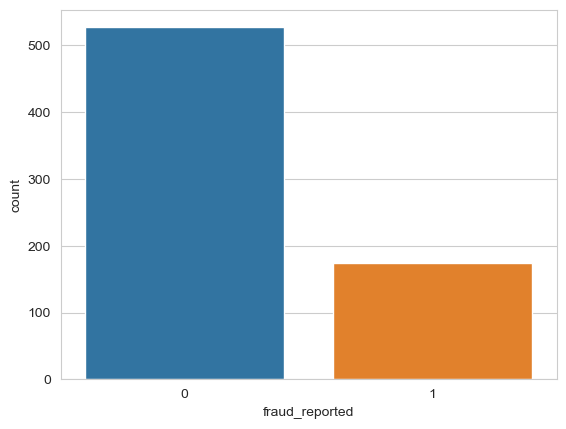

In [50]:
sns.set_style('whitegrid')
sns.countplot(x='fraud_reported',data=df)

In [51]:
import pandas as pd
from imblearn.over_sampling import BorderlineSMOTE
import seaborn as sns




# Perform Borderline SMOTE resampling
x_rus, y_rus = BorderlineSMOTE().fit_resample(x, y)

# Print the original and resampled dataset shapes
print('Original Target dataset shape:', y.shape)
print('Resample Target dataset shape', y_rus.shape)




Original Target dataset shape: (701,)
Resample Target dataset shape (1054,)


# spliting train and test data

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [57]:
x_train.shape

(769, 39)

In [58]:
y_train.shape

(769,)

In [59]:
x_test.shape

(285, 39)

In [60]:
y_test.shape

(285,)

# model building

In [61]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")


# logistic regression

In [65]:
logreg = LogisticRegression()

# Perform cross-validation
logreg_score = cross_val_score(logreg, x_rus, y_rus, cv=5, scoring='accuracy')
print("Cross validation score for logreg:", np.mean(logreg_score)*100)

# Train the model
logreg.fit(x_train, y_train)

# Make predictions
LR_predicted = logreg.predict(x_test)

# Evaluate the model
print("Training accuracy::", logreg.score(x_train, y_train)*100)
print("Test accuracy::", logreg.score(x_test, y_test)*100)
print("Accuracy score for logreg:", accuracy_score(y_test, LR_predicted)*100)
print("Confusion matrix for logreg:")
print(confusion_matrix(y_test, LR_predicted))
print("Classification report for logreg:")
print(classification_report(y_test, LR_predicted))

Cross validation score for logreg: 76.37598736176935
Training accuracy:: 77.89336801040312
Test accuracy:: 75.08771929824562
Accuracy score for logreg: 75.08771929824562
Confusion matrix for logreg:
[[103  41]
 [ 30 111]]
Classification report for logreg:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       144
           1       0.73      0.79      0.76       141

    accuracy                           0.75       285
   macro avg       0.75      0.75      0.75       285
weighted avg       0.75      0.75      0.75       285



# DECISIONTREECLASSIFIER

In [70]:
dtc = DecisionTreeClassifier()

# Perform cross-validation
dtc_score = cross_val_score(dtc, x_rus, y_rus, cv=5, scoring='accuracy')
print("Cross validation score for dtc:", np.mean(dtc_score)*100)

# Train the model
dtc.fit(x_train, y_train)

# Make predictions
predicted_dtc = dtc.predict(x_test)

# Evaluate the model
print("Training accuracy::", dtc.score(x_train, y_train)*100)
print("Test accuracy::", dtc.score(x_test, y_test)*100)
print("Accuracy score for dtc:", accuracy_score(y_test, predicted_dtc)*100)
print("Confusion matrix for dtc:")
print(confusion_matrix(y_test, predicted_dtc))
print("Classification report for dtc:")
print(classification_report(y_test, predicted_dtc))

Cross validation score for dtc: 83.68630106070863
Training accuracy:: 100.0
Test accuracy:: 85.26315789473684
Accuracy score for dtc: 85.26315789473684
Confusion matrix for dtc:
[[125  19]
 [ 23 118]]
Classification report for dtc:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       144
           1       0.86      0.84      0.85       141

    accuracy                           0.85       285
   macro avg       0.85      0.85      0.85       285
weighted avg       0.85      0.85      0.85       285



# Kneighbors classifier

In [71]:
knn = KNeighborsClassifier()

# Perform cross-validation
knn_score = cross_val_score(knn, x_rus, y_rus, cv=5, scoring='accuracy')
print("Cross validation score for knn:", np.mean(knn_score))

# Train the model
knn.fit(x_train, y_train)

# Make predictions
predicted_knn = knn.predict(x_test)

# Evaluate the model
print("Training accuracy::", knn.score(x_train, y_train))
print("Test accuracy::", knn.score(x_test, y_test))
print("Accuracy score for knn:", accuracy_score(y_test, predicted_knn))
print("Confusion matrix for knn:")
print(confusion_matrix(y_test, predicted_knn))
print("Classification report for knn:")
print(classification_report(y_test, predicted_knn))

Cross validation score for knn: 0.6527555856465809
Training accuracy:: 0.7451235370611183
Test accuracy:: 0.6140350877192983
Accuracy score for knn: 0.6140350877192983
Confusion matrix for knn:
[[ 39 105]
 [  5 136]]
Classification report for knn:
              precision    recall  f1-score   support

           0       0.89      0.27      0.41       144
           1       0.56      0.96      0.71       141

    accuracy                           0.61       285
   macro avg       0.73      0.62      0.56       285
weighted avg       0.73      0.61      0.56       285



# RandomforestClassifier

In [72]:
rfc = RandomForestClassifier()

# Perform cross-validation
rfc_score = cross_val_score(rfc, x_rus, y_rus, cv=5, scoring='accuracy')
print("Cross validation score for rfc:", np.mean(rfc_score))

# Train the model
rfc.fit(x_train, y_train)

# Make predictions
predicted_rfc = rfc.predict(x_test)

# Evaluate the model
print("Training accuracy::", rfc.score(x_train, y_train))
print("Test accuracy::", rfc.score(x_test, y_test))
print("Accuracy score for rfc:", accuracy_score(y_test, predicted_rfc))
print("Confusion matrix for rfc:")
print(confusion_matrix(y_test, predicted_rfc))
print("Classification report for rfc:")
print(classification_report(y_test, predicted_rfc))

Cross validation score for rfc: 0.8757707063868201
Training accuracy:: 1.0
Test accuracy:: 0.8491228070175438
Accuracy score for rfc: 0.8491228070175438
Confusion matrix for rfc:
[[125  19]
 [ 24 117]]
Classification report for rfc:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       144
           1       0.86      0.83      0.84       141

    accuracy                           0.85       285
   macro avg       0.85      0.85      0.85       285
weighted avg       0.85      0.85      0.85       285



# Ensemble technique
# 1.AdaBoost Classifier

In [73]:
adb = AdaBoostClassifier()

# Perform cross-validation
adb_score = cross_val_score(adb, x_rus, y_rus, cv=5, scoring='accuracy')
print("Cross validation score for adb:", np.mean(adb_score))

# Train the model
adb.fit(x_train, y_train)

# Make predictions
predicted_adb = adb.predict(x_test)

# Evaluate the model
print("Training accuracy::", adb.score(x_train, y_train))
print("Test accuracy::", adb.score(x_test, y_test))
print("Accuracy score for adb:", accuracy_score(y_test, predicted_adb))
print("Confusion matrix for adb:")
print(confusion_matrix(y_test, predicted_adb))
print("Classification report for adb:")
print(classification_report(y_test, predicted_adb))

Cross validation score for adb: 0.8492123674114197
Training accuracy:: 0.9102730819245773
Test accuracy:: 0.8596491228070176
Accuracy score for adb: 0.8596491228070176
Confusion matrix for adb:
[[127  17]
 [ 23 118]]
Classification report for adb:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       144
           1       0.87      0.84      0.86       141

    accuracy                           0.86       285
   macro avg       0.86      0.86      0.86       285
weighted avg       0.86      0.86      0.86       285



# 2.Bagging Classifier

In [74]:
bgc = BaggingClassifier()

# Perform cross-validation
bgc_score = cross_val_score(bgc, x_rus, y_rus, cv=5, scoring='accuracy')
print("Cross validation score for bgc:", np.mean(bgc_score))

# Train the model
bgc.fit(x_train, y_train)

# Make predictions
predicted_bgc = bgc.predict(x_test)

# Evaluate the model
print("Training accuracy::", bgc.score(x_train, y_train))
print("Test accuracy::", bgc.score(x_test, y_test))
print("Accuracy score for bgc:", accuracy_score(y_test, predicted_bgc))
print("Confusion matrix for bgc:")
print(confusion_matrix(y_test, predicted_bgc))
print("Classification report for bgc:")
print(classification_report(y_test, predicted_bgc))

Cross validation score for bgc: 0.863421349582487
Training accuracy:: 0.9921976592977894
Test accuracy:: 0.8456140350877193
Accuracy score for bgc: 0.8456140350877193
Confusion matrix for bgc:
[[126  18]
 [ 26 115]]
Classification report for bgc:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       144
           1       0.86      0.82      0.84       141

    accuracy                           0.85       285
   macro avg       0.85      0.85      0.85       285
weighted avg       0.85      0.85      0.85       285



In [75]:
grbc = GradientBoostingClassifier()

# Perform cross-validation
grbc_score = cross_val_score(grbc, x_rus, y_rus, cv=5, scoring='accuracy')
print("Cross validation score for grbc:", np.mean(grbc_score))

# Train the model
grbc.fit(x_train, y_train)

# Make predictions
predicted_grbc = grbc.predict(x_test)

# Evaluate the model
print("Training accuracy::", grbc.score(x_train, y_train))
print("Test accuracy::", grbc.score(x_test, y_test))
print("Accuracy score for grbc:", accuracy_score(y_test, predicted_grbc))
print("Confusion matrix for grbc:")
print(confusion_matrix(y_test, predicted_grbc))
print("Classification report for grbc:")
print(classification_report(y_test, predicted_grbc))

Cross validation score for grbc: 0.8662875197472355
Training accuracy:: 0.988296488946684
Test accuracy:: 0.8631578947368421
Accuracy score for grbc: 0.8631578947368421
Confusion matrix for grbc:
[[124  20]
 [ 19 122]]
Classification report for grbc:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       144
           1       0.86      0.87      0.86       141

    accuracy                           0.86       285
   macro avg       0.86      0.86      0.86       285
weighted avg       0.86      0.86      0.86       285



# observation

Choosing :-
Gradietn Boosting Classifier as final model for Hyper Parameter Tuning because both train and test accuracies are close and highest as well

Rest of the models having huge difference between train and test accuracies so no considering them.